# Lab 2 - Exercise 1 - Answers

Here we load in a subset of World Indicators data collected by the worldbank([link to dataset](https://datacatalog.worldbank.org/dataset/world-development-indicators)). The notebook containing the code used to subset the data is in the 'Wrangling World Indicators' notebook file available on Moodle.

The dataset contains data from the UK, France, Germany and Italy. The variables we look at are:

* GDP per capita (current US Dollars)
* Imports of goods and services (current US Dollars)
* Land area (sq. km)
* Life expectancy at birth, total (years)
* Population in largest city
* Population growth (annual %)
* Population, total
* Primary education, duration (years) 
* Progression to secondary school (%)
* Rural population (% of total population)

and the data, though incomplete, starts from 1960 till 2004.

Load in pandas and the dataset.

In [1]:
import pandas as pd
df = pd.read_csv('world_indicators_pandas.csv', encoding='UTF-8')

How does the data look?

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 13 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Country_Name                                 180 non-null    object 
 1   year                                         180 non-null    int64  
 2   Access_to_electricity_(%_of_population)      60 non-null     float64
 3   GDP_per_capita_(current_US$)                 170 non-null    float64
 4   Imports_of_goods_and_services_(current_US$)  150 non-null    float64
 5   Land_area_(sq._km)                           176 non-null    float64
 6   Life_expectancy_at_birth,_total_(years)      180 non-null    float64
 7   Population_growth_(annual_%)                 176 non-null    float64
 8   Population_in_largest_city                   180 non-null    float64
 9   Population,_total                            180 non-null    float64
 10  Pr

Change year to datetime instead of an integer.

In [3]:
df['year'] =  pd.to_datetime(df['year'], format='%Y')
df.dtypes

Country_Name                                           object
year                                           datetime64[ns]
Access_to_electricity_(%_of_population)               float64
GDP_per_capita_(current_US$)                          float64
Imports_of_goods_and_services_(current_US$)           float64
Land_area_(sq._km)                                    float64
Life_expectancy_at_birth,_total_(years)               float64
Population_growth_(annual_%)                          float64
Population_in_largest_city                            float64
Population,_total                                     float64
Primary_education,_duration_(years)                   float64
Progression_to_secondary_school_(%)                   float64
Rural_population_(%_of_total_population)              float64
dtype: object

It looks like we have some missing data.

In [4]:
df.shape[0] - df.count()

Country_Name                                     0
year                                             0
Access_to_electricity_(%_of_population)        120
GDP_per_capita_(current_US$)                    10
Imports_of_goods_and_services_(current_US$)     30
Land_area_(sq._km)                               4
Life_expectancy_at_birth,_total_(years)          0
Population_growth_(annual_%)                     4
Population_in_largest_city                       0
Population,_total                                0
Primary_education,_duration_(years)             40
Progression_to_secondary_school_(%)            130
Rural_population_(%_of_total_population)         0
dtype: int64

In [5]:
# Or we could use this other approach, as well:
df.isnull().sum()

Country_Name                                     0
year                                             0
Access_to_electricity_(%_of_population)        120
GDP_per_capita_(current_US$)                    10
Imports_of_goods_and_services_(current_US$)     30
Land_area_(sq._km)                               4
Life_expectancy_at_birth,_total_(years)          0
Population_growth_(annual_%)                     4
Population_in_largest_city                       0
Population,_total                                0
Primary_education,_duration_(years)             40
Progression_to_secondary_school_(%)            130
Rural_population_(%_of_total_population)         0
dtype: int64

What do the top 5 rows look like?

In [6]:
df.head()

,Country_Name,year,Access_to_electricity_(%_of_population),GDP_per_capita_(current_US$),Imports_of_goods_and_services_(current_US$),Land_area_(sq._km),"Life_expectancy_at_birth,_total_(years)",Population_growth_(annual_%),Population_in_largest_city,"Population,_total","Primary_education,_duration_(years)",Progression_to_secondary_school_(%),Rural_population_(%_of_total_population)
0,France,1960-01-01,NaN,1334.690056,7.703449e+09,NaN,69.868293,NaN,7410735.0,46621669.0,NaN,NaN,38.120
1,France,1961-01-01,NaN,1428.045487,8.273435e+09,547566.0156,70.117073,1.318705,7539888.0,47240543.0,NaN,NaN,37.393
2,France,1962-01-01,NaN,1578.284604,9.042717e+09,547566.0156,70.314634,1.396483,7650751.0,47904877.0,NaN,NaN,36.511
3,France,1963-01-01,NaN,1744.640590,1.036737e+10,547566.0156,70.514634,1.404835,7718298.0,48582611.0,NaN,NaN,35.298
4,France,1964-01-01,NaN,1909.541232,1.213712e+10,547566.0156,70.663415,1.324961,7786535.0,49230595.0,NaN,NaN,34.102


We can look at the top 2 if we like.

In [7]:
df.iloc[0:2,:]

,Country_Name,year,Access_to_electricity_(%_of_population),GDP_per_capita_(current_US$),Imports_of_goods_and_services_(current_US$),Land_area_(sq._km),"Life_expectancy_at_birth,_total_(years)",Population_growth_(annual_%),Population_in_largest_city,"Population,_total","Primary_education,_duration_(years)",Progression_to_secondary_school_(%),Rural_population_(%_of_total_population)
0,France,1960-01-01,NaN,1334.690056,7.703449e+09,NaN,69.868293,NaN,7410735.0,46621669.0,NaN,NaN,38.120
1,France,1961-01-01,NaN,1428.045487,8.273435e+09,547566.0156,70.117073,1.318705,7539888.0,47240543.0,NaN,NaN,37.393


Or all the rows for a particular variable.

In [8]:
df.iloc[:,3]

0       1334.690056
1       1428.045487
2       1578.284604
3       1744.640590
4       1909.541232
           ...     
175    28149.870010
176    27744.506460
177    30056.586220
178    34419.147910
179    40290.313970
Name: GDP_per_capita_(current_US$), Length: 180, dtype: float64

We can pick out data for a particular country.

In [9]:
df[df.Country_Name == 'Germany']

,Country_Name,year,Access_to_electricity_(%_of_population),GDP_per_capita_(current_US$),Imports_of_goods_and_services_(current_US$),Land_area_(sq._km),"Life_expectancy_at_birth,_total_(years)",Population_growth_(annual_%),Population_in_largest_city,"Population,_total","Primary_education,_duration_(years)",Progression_to_secondary_school_(%),Rural_population_(%_of_total_population)
45,Germany,1960-01-01,NaN,NaN,NaN,NaN,69.310024,NaN,3259833.0,72814900.0,NaN,NaN,28.616
46,Germany,1961-01-01,NaN,NaN,NaN,349130.0,69.508000,0.769854,3252346.0,73377632.0,NaN,NaN,28.303
47,Germany,1962-01-01,NaN,NaN,NaN,349130.0,69.691537,0.879432,3247311.0,74025784.0,NaN,NaN,28.238
48,Germany,1963-01-01,NaN,NaN,NaN,349130.0,69.859610,0.925875,3242284.0,74714353.0,NaN,NaN,28.174
49,Germany,1964-01-01,NaN,NaN,NaN,349130.0,70.013707,0.805141,3237257.0,75318337.0,NaN,NaN,28.109
50,Germany,1965-01-01,NaN,NaN,NaN,349130.0,70.151829,0.853190,3232253.0,75963695.0,NaN,NaN,28.045
51,Germany,1966-01-01,NaN,NaN,NaN,349130.0,70.271415,0.834561,3227249.0,76600311.0,NaN,NaN,27.981
52,Germany,1967-01-01,NaN,NaN,NaN,349130.0,70.374000,0.457209,3222253.0,76951336.0,NaN,NaN,27.917
53,Germany,1968-01-01,NaN,NaN,NaN,349130.0,70.465098,0.444717,3217257.0,77294314.0,NaN,NaN,27.853
54,Germany,1969-01-01,NaN,NaN,NaN,349130.0,70.550683,0.792984,3212283.0,77909682.0,NaN,NaN,27.789


Or a paticular country and variable.

In [10]:
df[df.Country_Name == 'Germany']['Land_area_(sq._km)']

45         NaN
46    349130.0
47    349130.0
48    349130.0
49    349130.0
50    349130.0
51    349130.0
52    349130.0
53    349130.0
54    349130.0
55    349130.0
56    349130.0
57    349130.0
58    349130.0
59    349130.0
60    349130.0
61    349130.0
62    349130.0
63    349130.0
64    349130.0
65    349130.0
66    349130.0
67    349130.0
68    349130.0
69    349130.0
70    349130.0
71    349130.0
72    349130.0
73    349130.0
74    349130.0
75    349130.0
76    349130.0
77    349130.0
78    349120.0
79    349110.0
80    349100.0
81    349090.0
82    349050.0
83    349020.0
84    348980.0
85    348950.0
86    348900.0
87    348860.0
88    348810.0
89    348770.0
Name: Land_area_(sq._km), dtype: float64

In [11]:
df[df.Country_Name == 'France']['Land_area_(sq._km)']

0             NaN
1     547566.0156
2     547566.0156
3     547566.0156
4     547566.0156
5     547566.0156
6     547566.0156
7     547566.0156
8     547566.0156
9     547566.0156
10    547566.0156
11    547566.0156
12    547566.0156
13    547566.0156
14    547566.0156
15    547566.0156
16    547566.0156
17    547566.0156
18    547566.0156
19    547566.0156
20    547566.0156
21    547566.0156
22    547566.0156
23    547566.0156
24    547566.0156
25    547566.0156
26    547566.0156
27    547566.0156
28    547566.0156
29    547566.0156
30    547566.0156
31    547566.0156
32    547566.0156
33    547566.0156
34    547566.0156
35    547566.0156
36    547566.0156
37    547566.0156
38    547566.0156
39    547566.0156
40    547566.9922
41    547566.9922
42    547566.9922
43    547866.9922
44    547566.9922
Name: Land_area_(sq._km), dtype: float64

The first land area value is `NaN`. We could fill the first value with the lowest for that country.

Below, we use the `.` notation to grab a column and this can be more convenient and we use `df.loc` (see the [pandas documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.loc.html)). For each country we set all the values of Land Area to the lowest for that country. That overwrites the NaN with the correct value.

In [29]:
for country in df.Country_Name.unique():
        df.loc[df.Country_Name == country, 'Land_area_(sq._km)'] = df.loc[df.Country_Name == country, 'Land_area_(sq._km)'].min()


We can also scale GDP and population growth between 0 and 1.

In [13]:
df['GDP_scaled'] = (df['GDP_per_capita_(current_US$)'] - df['GDP_per_capita_(current_US$)'].min()) / (df['GDP_per_capita_(current_US$)'].max() - df['GDP_per_capita_(current_US$)'].min())
df['pop_scaled'] = (df['Population,_total'] - df['Population,_total'].min()) / (df['Population,_total'].max() - df['Population,_total'].min())

Make sure it looks ok.

In [14]:
df[['Country_Name', 'GDP_scaled', 'pop_scaled']]

,Country_Name,GDP_scaled,pop_scaled
0,France,0.013428,0.000000
1,France,0.015792,0.017233
2,France,0.019597,0.035732
3,France,0.023810,0.054603
4,France,0.027986,0.072647
...,...,...,...
175,United Kingdom,0.692537,0.341687
176,United Kingdom,0.682271,0.348013
177,United Kingdom,0.740825,0.354996
178,United Kingdom,0.851310,0.362712


Or we could check the min and max values for each attribute:

In [33]:
df[['Country_Name', 'GDP_scaled', 'pop_scaled']].min()

Country_Name    France
GDP_scaled         0.0
pop_scaled         0.0
dtype: object

In [34]:

df[['Country_Name', 'GDP_scaled', 'pop_scaled']].max()

Country_Name    United Kingdom
GDP_scaled                 1.0
pop_scaled                 1.0
dtype: object

Hmm, looks good.

In [15]:
df.head()

,Country_Name,year,Access_to_electricity_(%_of_population),GDP_per_capita_(current_US$),Imports_of_goods_and_services_(current_US$),Land_area_(sq._km),"Life_expectancy_at_birth,_total_(years)",Population_growth_(annual_%),Population_in_largest_city,"Population,_total","Primary_education,_duration_(years)",Progression_to_secondary_school_(%),Rural_population_(%_of_total_population),GDP_scaled,pop_scaled
0,France,1960-01-01,NaN,1334.690056,7.703449e+09,547566.0156,69.868293,NaN,7410735.0,46621669.0,NaN,NaN,38.120,0.013428,0.000000
1,France,1961-01-01,NaN,1428.045487,8.273435e+09,547566.0156,70.117073,1.318705,7539888.0,47240543.0,NaN,NaN,37.393,0.015792,0.017233
2,France,1962-01-01,NaN,1578.284604,9.042717e+09,547566.0156,70.314634,1.396483,7650751.0,47904877.0,NaN,NaN,36.511,0.019597,0.035732
3,France,1963-01-01,NaN,1744.640590,1.036737e+10,547566.0156,70.514634,1.404835,7718298.0,48582611.0,NaN,NaN,35.298,0.023810,0.054603
4,France,1964-01-01,NaN,1909.541232,1.213712e+10,547566.0156,70.663415,1.324961,7786535.0,49230595.0,NaN,NaN,34.102,0.027986,0.072647


We should get an overview of our variables.

In [16]:
df.describe()

,Access_to_electricity_(%_of_population),GDP_per_capita_(current_US$),Imports_of_goods_and_services_(current_US$),Land_area_(sq._km),"Life_expectancy_at_birth,_total_(years)",Population_growth_(annual_%),Population_in_largest_city,"Population,_total","Primary_education,_duration_(years)",Progression_to_secondary_school_(%),Rural_population_(%_of_total_population),GDP_scaled,pop_scaled
count,60.0,170.000000,1.500000e+02,180.00000,180.000000,176.000000,1.800000e+02,1.800000e+02,140.000000,50.000000,180.000000,170.000000,180.000000
mean,100.0,13105.943717,2.182631e+11,358094.00390,74.322621,0.395272,5.664154e+06,6.154165e+07,5.000000,98.687143,27.740872,0.311541,0.415454
std,0.0,10009.966598,1.755183e+11,116053.76805,3.032093,0.340439,2.470666e+06,1.038525e+07,0.709646,1.289416,5.073460,0.253508,0.289182
min,100.0,804.492623,7.703449e+09,241930.00000,69.123902,-0.428767,2.455581e+06,4.662167e+07,4.000000,94.296680,20.371000,0.000000,0.000000
25%,100.0,3632.325079,7.797249e+10,281065.00000,71.652439,0.112070,3.313691e+06,5.537565e+07,4.750000,97.853025,23.080250,0.071616,0.243758
50%,100.0,9953.579859,1.810405e+11,321440.00000,74.116341,0.387827,5.238320e+06,5.685229e+07,5.000000,99.279425,26.966500,0.231706,0.284876
75%,100.0,22295.507027,3.155762e+11,398469.00390,76.906707,0.647951,7.858515e+06,6.523240e+07,5.250000,99.772180,32.853000,0.544272,0.518224
max,100.0,40290.313970,8.571630e+11,547566.01560,80.780488,1.404835,1.001980e+07,8.253418e+07,6.000000,100.000000,40.639000,1.000000,1.000000


A few observations:

* The countries we are looking at have had 100% access to electricity. It is not useful in this subset but may be for developing countries.
* Population growth looks interesting. It was negative for at least one year.
* There seems to be some difference in progression to secondary school.

We should describe the data for each country so we can see the differences.

In [17]:
df.groupby('Country_Name').describe()

Access_to_electricity_(%_of_population)                     \
                                                 count   mean  std    min   
Country_Name                                                                
France                                            15.0  100.0  0.0  100.0   
Germany                                           15.0  100.0  0.0  100.0   
Italy                                             15.0  100.0  0.0  100.0   
United Kingdom                                    15.0  100.0  0.0  100.0   

                                           GDP_per_capita_(current_US$)  \
                  25%    50%    75%    max                        count   
Country_Name                                                              
France          100.0  100.0  100.0  100.0                         45.0   
Germany         100.0  100.0  100.0  100.0                         35.0   
Italy           100.0  100.0  100.0  100.0                         45.0   
United Kingdom  100.0  100.0  100.0  100.0                         45.0   

                              ... GDP_scaled           pop_scaled            \
                        mean  ...        75%       max      count      mean   
Country_Name                  ...                                             
France          12963.450996  ...   0.546414  0.834142       45.0  0.247291   
Germany         16940.032869  ...   0.637594  0.841810       45.0  0.895484   
Italy           10942.914835  ...   0.498374  0.771295       45.0  0.242969   
United Kingdom  12429.395977  ...   0.483623  1.000000       45.0  0.276070   

                                                                            
                     std       min       25%       50%       75%       max  
Country_Name                                                                
France          0.120816  0.000000  0.160102  0.253317  0.347653  0.447845  
Germany         0.069917  0.729362  0.869286  0.883027  0.961634  1.000000  
Italy           0.058491  0.099632  0.207499  0.276279  0.284306  0.308073  
United Kingdom  0.049162  0.160900  0.258254  0.270412  0.308999  0.372189  

[4 rows x 104 columns]

It is too wide. We can select specific variables.

In [18]:
df[['Country_Name', 'Progression_to_secondary_school_(%)']].groupby('Country_Name').describe()

Progression_to_secondary_school_(%)                       \
                                             count       mean       std   
Country_Name                                                              
France                                        10.0  97.958886  0.945906   
Germany                                       10.0  99.866492  0.113552   
Italy                                         30.0  98.536779  1.357074   
United Kingdom                                 0.0        NaN       NaN   

                                                                      
                     min        25%        50%        75%        max  
Country_Name                                                          
France          96.13982  97.753287  97.856380  97.963695  100.00000  
Germany         99.64366  99.794110  99.888225  99.958998   99.99333  
Italy           94.29668  97.680000  99.232225  99.564145   99.83511  
United Kingdom       NaN        NaN        NaN        NaN        NaN

Italy is the country with a minumum of 94% whereas the UK has no data.

Narrowing in on GPD per capita.

In [19]:
df['GDP_per_capita_(current_US$)'].describe()

count      170.000000
mean     13105.943717
std      10009.966598
min        804.492623
25%       3632.325079
50%       9953.579859
75%      22295.507027
max      40290.313970
Name: GDP_per_capita_(current_US$), dtype: float64

By country.

In [20]:
df[['Country_Name','GDP_per_capita_(current_US$)']].groupby('Country_Name').describe()

GDP_per_capita_(current_US$)                              \
                                      count          mean           std   
Country_Name                                                              
France                                 45.0  12963.450996   9663.486204   
Germany                                35.0  16940.032869   9681.716248   
Italy                                  45.0  10942.914835   9135.899972   
United Kingdom                         45.0  12429.395977  10890.817686   

                                                                     \
                        min          25%           50%          75%   
Country_Name                                                          
France          1334.690056  3169.034992  10496.929870  22380.10396   
Germany         2761.166836  9371.369313  16677.510790  25980.42998   
Italy            804.492623  2305.609774   7739.715280  20483.21599   
United Kingdom  1397.594803  2649.801514   8691.518813  19900.72665   

                             
                        max  
Country_Name                 
France          33741.26515  
Germany         34044.05363  
Italy           31259.71650  
United Kingdom  40290.31397

Germany has the highest GDP per capita but we also have less data points. Why is this?

Plotting GDP by year will give us a sense of our GDP data.

<AxesSubplot:xlabel='year'>

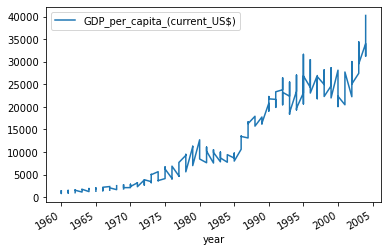

In [21]:
df.plot(x='year', y="GDP_per_capita_(current_US$)")

Split by country.

Country_Name
France            AxesSubplot(0.125,0.125;0.775x0.755)
Germany           AxesSubplot(0.125,0.125;0.775x0.755)
Italy             AxesSubplot(0.125,0.125;0.775x0.755)
United Kingdom    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

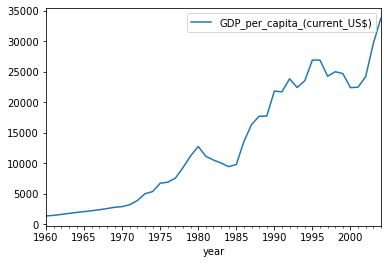

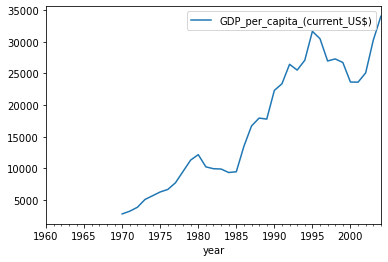

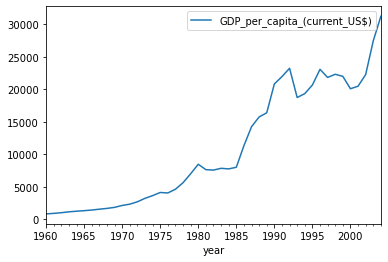

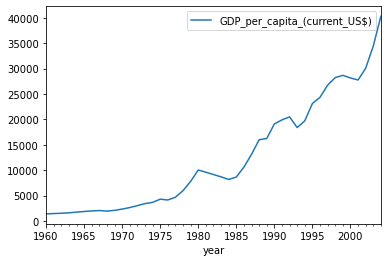

In [22]:
df.groupby('Country_Name').plot(x='year', y="GDP_per_capita_(current_US$)")

How about life expectancy?

Country_Name
France            AxesSubplot(0.125,0.125;0.775x0.755)
Germany           AxesSubplot(0.125,0.125;0.775x0.755)
Italy             AxesSubplot(0.125,0.125;0.775x0.755)
United Kingdom    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

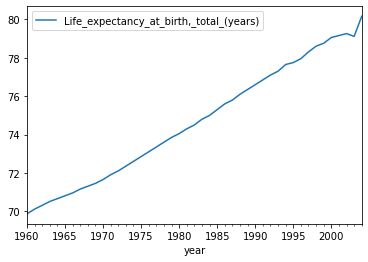

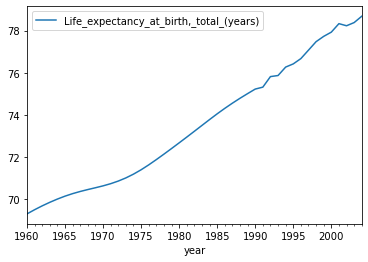

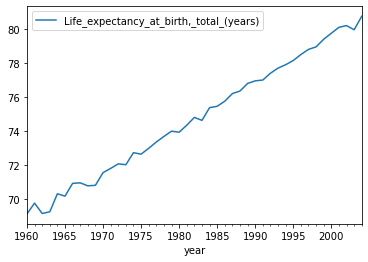

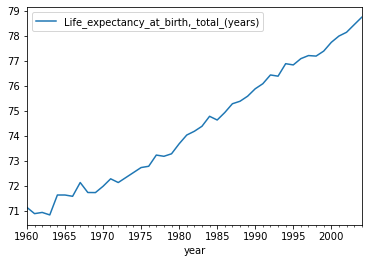

In [23]:
df.groupby('Country_Name').plot(x='year', y="Life_expectancy_at_birth,_total_(years)")

Both increase over time. If we ignore year.

Country_Name
France            AxesSubplot(0.125,0.125;0.775x0.755)
Germany           AxesSubplot(0.125,0.125;0.775x0.755)
Italy             AxesSubplot(0.125,0.125;0.775x0.755)
United Kingdom    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

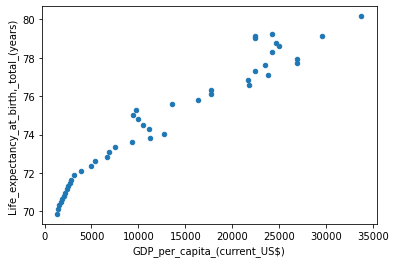

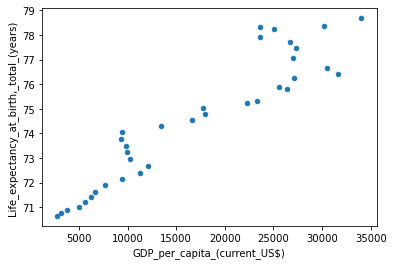

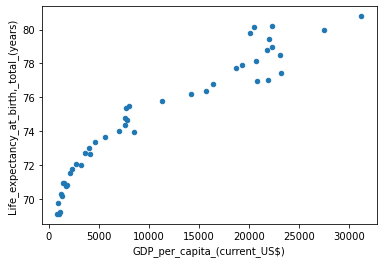

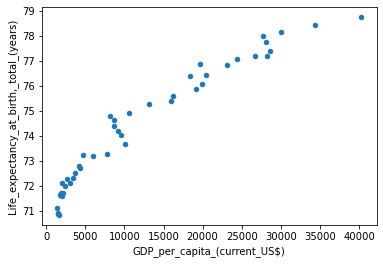

In [24]:
df.groupby('Country_Name').plot(x="GDP_per_capita_(current_US$)", y="Life_expectancy_at_birth,_total_(years)", kind='scatter')

We should plot our scaled variabled against one another in seaborn.

First, we let us remind ourselves what our data looks like.

In [25]:
df.head()

,Country_Name,year,Access_to_electricity_(%_of_population),GDP_per_capita_(current_US$),Imports_of_goods_and_services_(current_US$),Land_area_(sq._km),"Life_expectancy_at_birth,_total_(years)",Population_growth_(annual_%),Population_in_largest_city,"Population,_total","Primary_education,_duration_(years)",Progression_to_secondary_school_(%),Rural_population_(%_of_total_population),GDP_scaled,pop_scaled
0,France,1960-01-01,NaN,1334.690056,7.703449e+09,547566.0156,69.868293,NaN,7410735.0,46621669.0,NaN,NaN,38.120,0.013428,0.000000
1,France,1961-01-01,NaN,1428.045487,8.273435e+09,547566.0156,70.117073,1.318705,7539888.0,47240543.0,NaN,NaN,37.393,0.015792,0.017233
2,France,1962-01-01,NaN,1578.284604,9.042717e+09,547566.0156,70.314634,1.396483,7650751.0,47904877.0,NaN,NaN,36.511,0.019597,0.035732
3,France,1963-01-01,NaN,1744.640590,1.036737e+10,547566.0156,70.514634,1.404835,7718298.0,48582611.0,NaN,NaN,35.298,0.023810,0.054603
4,France,1964-01-01,NaN,1909.541232,1.213712e+10,547566.0156,70.663415,1.324961,7786535.0,49230595.0,NaN,NaN,34.102,0.027986,0.072647


Then we can melt our data.

In [26]:
df_long=pd.melt(df, id_vars=['Country_Name', 'year'], value_vars=['GDP_scaled', 'pop_scaled'])
df_long

,Country_Name,year,variable,value
0,France,1960-01-01,GDP_scaled,0.013428
1,France,1961-01-01,GDP_scaled,0.015792
2,France,1962-01-01,GDP_scaled,0.019597
3,France,1963-01-01,GDP_scaled,0.023810
4,France,1964-01-01,GDP_scaled,0.027986
...,...,...,...,...
355,United Kingdom,2000-01-01,pop_scaled,0.341687
356,United Kingdom,2001-01-01,pop_scaled,0.348013
357,United Kingdom,2002-01-01,pop_scaled,0.354996
358,United Kingdom,2003-01-01,pop_scaled,0.362712


Then we can plot each by year.

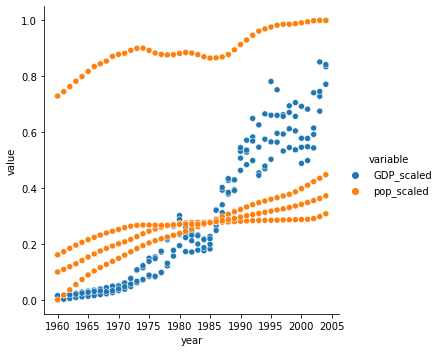

In [27]:
import seaborn as sns
sns.relplot(x='year', y='value', hue='variable', data=df_long)

Ah, there are different countries in the data. We should include that in our plot.

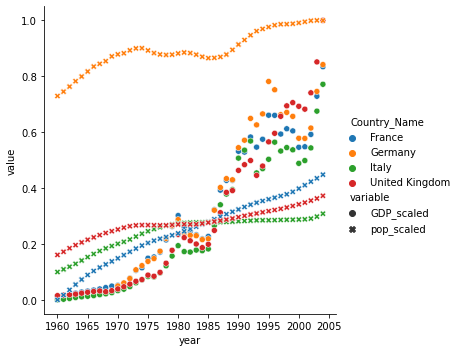

In [28]:
sns.relplot(x='year', y='value', style='variable', hue='Country_Name', data=df_long)

Do play around with these plots by changing the data variable names. Are there any interesting relationships between the different data variables?

In Exercise 2 we look at what else seaborn can do for us.